In [5]:
import numpy as np
import pandas as pd
import glob 
import os
pd.options.display.max_columns=50

In [6]:
results = glob.glob('./results/performances/www21-result-*')   # prelim-all-include-semi/
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

### Results of Individual Experiments

In [ ]:
# for i in range(1,num_logs):
#     df = pd.read_csv(list2[-i])
#     info = ','.join(list(df[['data', 'sampling']].iloc[0]))
#     print(info)

real-m,DATE/bATE


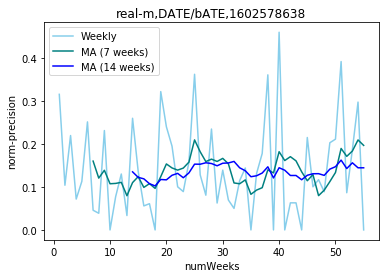

real-n,-


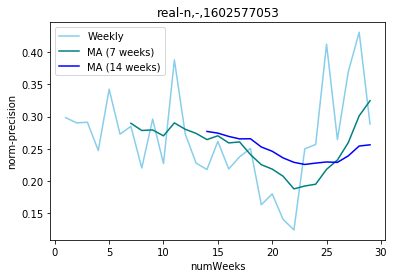

real-n,DATE/badge


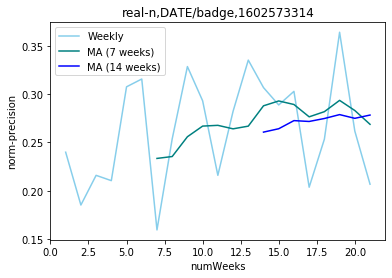

real-n,DATE/badge


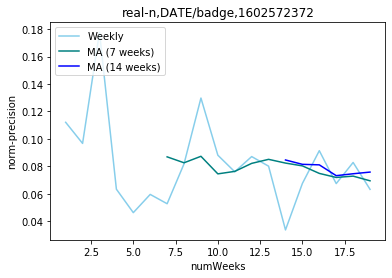

real-n,DATE/badge


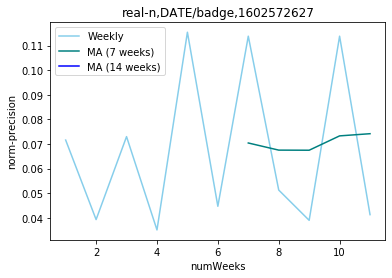

real-n,-


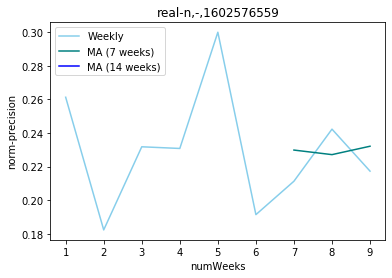

real-n,DATE/badge


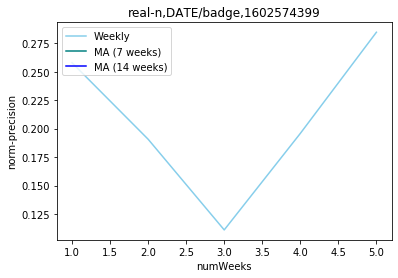

synthetic,DATE/badge


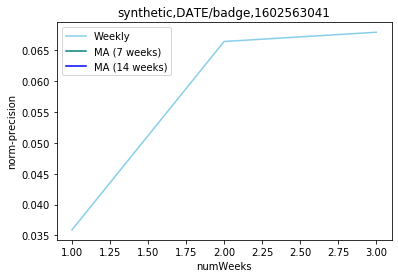

synthetic,DATE/badge


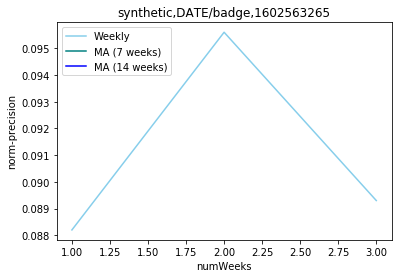

synthetic,DATE/badge


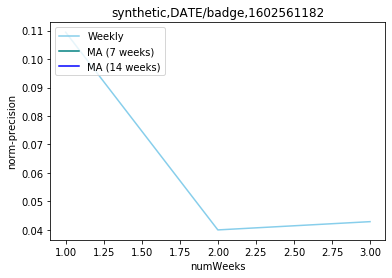

real-t,DATE/badge


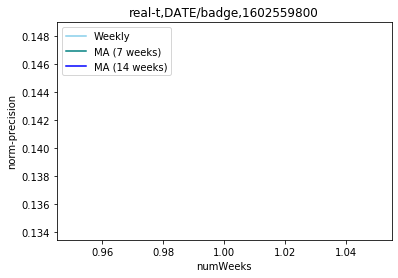

real-t,DATE/badge


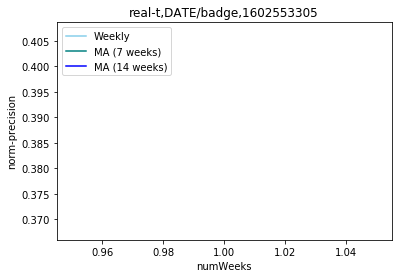

synthetic,DATE/badge


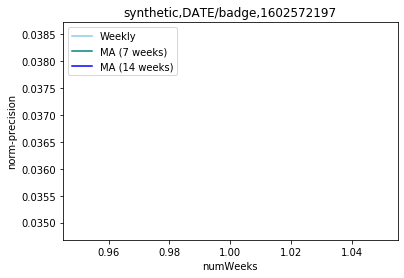

real-n,DATE/badge


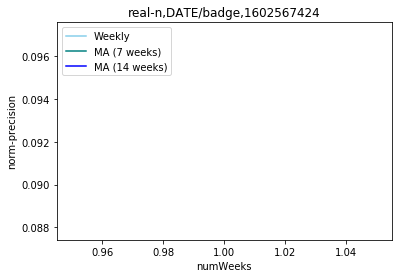

real-n,DATE/badge


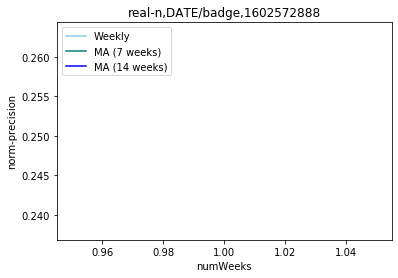

real-n,-


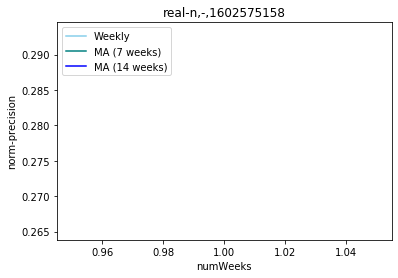

real-n,-


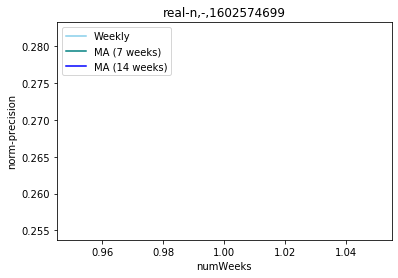

real-n,-


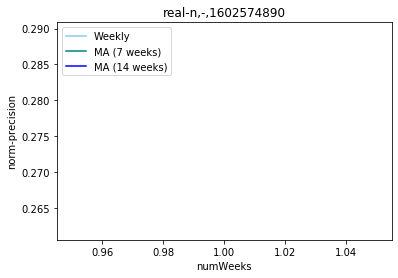

IndexError: single positional indexer is out-of-bounds

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 400])
for i in range(1,num_logs):
    df = pd.read_csv(list2[-i])
    var = 'norm-precision'
    plt.figure()
    rolling_mean7 = df[var].rolling(window=7).mean()
    rolling_mean14 = df[var].rolling(window=14).mean()
    
    filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
    info = ','.join(list(df[['data', 'subsamplings']].iloc[0]))
    print(info)
    plt.title(info+','+filename)
    plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
    plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
    plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
    plt.legend(loc='upper left')
    plt.ylabel(var)
    plt.xlabel('numWeeks')
    plt.show()
    
    full_results[info].append(rolling_mean14)
    plt.close()

### Mdata Simulation Results

In [ ]:
df[['data','subsamplings']]

In [ ]:
plt.figure()
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-m' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
     if key != 'real-m,xgb':
        print(key, len(full_results[key]))
        avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
        plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.show()
plt.close()

### Tdata Simulation Results

In [ ]:
plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    print(key, len(full_results[key]))
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    plt.plot(avg_result.index, avg_result, label=key)

# printing test_illicit_rate
tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.show()
plt.close()

### Ndata Simulation Results

In [ ]:
plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-n' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    print(key, len(full_results[key]))
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    plt.plot(avg_result.index, avg_result, label=key)
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.show()
plt.close()